In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [24]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
# X: features, y: class
X = df.drop('Class', axis = 1)
y = df['Class']

# train test split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Data standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Applying PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.72229951 0.2397406  0.03335483 0.00460506]


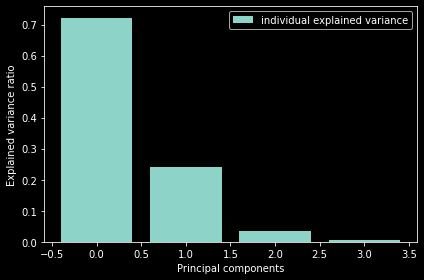

In [39]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(6, 4))

  plt.bar(range(4), explained_variance, alpha=1, align='center',
          label='individual explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal components')
  plt.legend(loc='best')
  plt.tight_layout()

In [42]:
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [57]:
# Using K-nearest neighbors
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)

print("Train accuracy: ",knn.score(X_train, y_train)*100,"%")
print("Test accuracy: ",knn.score(X_test, y_test)*100,"%")

Train accuracy:  97.5 %
Test accuracy:  100.0 %
